In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

First, improve your plot with the new features you learned during the encounter:

Rotate the x-ticks by 45 degrees
Color each point according to continent
Annotate 2 to 4 countries
Add grid-lines
Adjust the opacity of the points
Try out different plotting themes
To create an animated scatterplot showing the correlation between life expectancy and fertility, create one plot for each year between 1960 and 2015 (before that, the data contains too many gaps).

### Step 1
Write a for loop that goes through each year

### Step 2
In each iteration produce a scatterplot like the one you have made in the previous challenges

### Step 3
Save each scatterplot to a separate file containing the year in the filename, e.g. plot_1999.png.

### Step 4
After saving the plot call plt.close() to remove the plot before plotting the next year.

### Step 5
To generate a gif file from the individual pictures, adjust the following code example and execute it:

```python
import imageio

images = []

for year in range(___, ___):
    filename = f'___'
    images.append(imageio.imread(___))

imageio.mimsave(___, images, fps=20)
````

**Tips**
+ make the size of the plot larger
+ set axis ranges for the complete story
+ use hue to color the points according to a column
+ use size to emphasize the difference in point dependent on a column value
+ try other things to tell your story to the fullest
+ use the function plt.axis(xmin, xmax, ymin, ymax) to fix the coordinates of the plot.

In [3]:
df = pd.read_csv('../data/gapminder_total.csv', index_col=0)

df_2015 = df[df['year'] == 2015]
df_2015

,year,country,continent,population,fertility,life expectancy
13063,2015,Afghanistan,Asia,32526562.0,4.47,53.8
13064,2015,Albania,Europe,2896679.0,1.78,78.0
13065,2015,Algeria,Africa,39666519.0,2.71,76.4
13066,2015,Angola,Africa,25021974.0,5.65,59.6
13067,2015,Antigua and Barbuda,North America,91818.0,2.06,76.4
...,...,...,...,...,...,...
16739,2015,Wallis et Futuna,NaN,13151.0,NaN,NaN
16740,2015,South Sudan,Africa,12339812.0,NaN,56.1
16741,2015,Curaçao,NaN,157203.0,NaN,NaN
16742,2015,Sint Maarten (Dutch part),NaN,38745.0,NaN,NaN


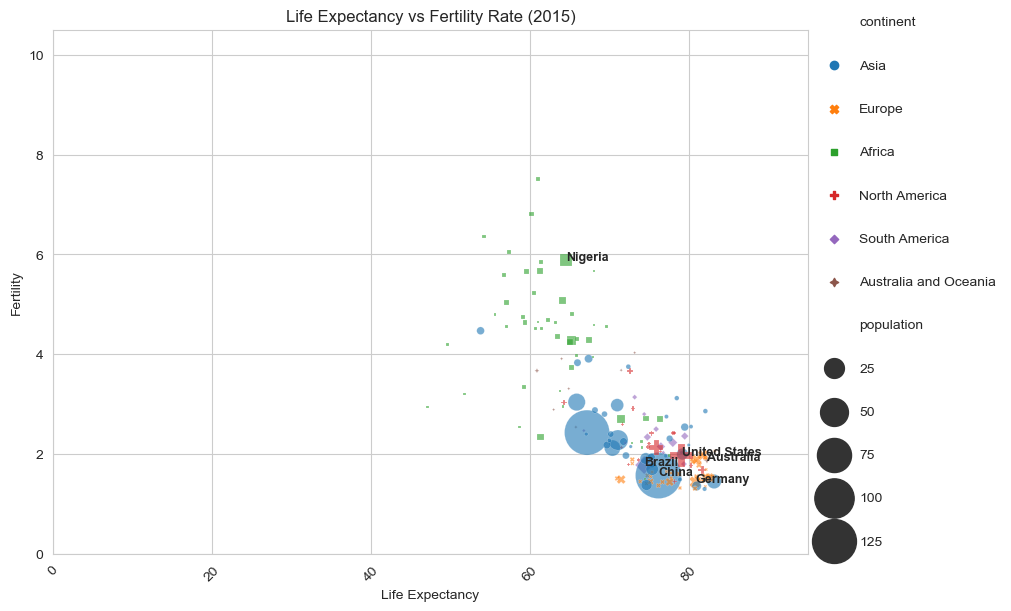

In [257]:
high_pop = df_2015.sort_values(by="population",ascending=False).groupby('continent').first().reset_index()
country = high_pop['country']

weighting = df_2015['population']/100_000_00

plt.figure(figsize=(10,6),layout='constrained')
sns.set_style('whitegrid')
plt.ylabel('Fertility') 
plt.xlabel('Life Expectancy')
plt.axis([0, 95, 0, 10.5])
plt.xticks(rotation=45)

yr = sns.scatterplot(data=df_2015, 
                x='life expectancy',
                y='fertility', 
                size=weighting,
                sizes=(5, 1100),
                style='continent',
                alpha = 0.6, 
                palette= 'tab10',
                hue='continent').set(title='Life Expectancy vs Fertility Rate (2015)');

for i in country:
    x_cor = (high_pop.loc[high_pop['country']== i, ['life expectancy']].values[0])
    y_cor = (high_pop.loc[high_pop['country']== i, ['fertility']].values[0])
    plt.text(s = i, x = x_cor, y = y_cor, fontsize =9, weight = 'bold')

plt.legend(bbox_to_anchor=(1, 1.05), frameon=False, fontsize=10,labelspacing=2.2);

In [113]:
def yr_df(year):
    yr_df = df[df['year'] == (year)]
    high_pop = yr_df.sort_values(by="population",ascending=False).groupby('continent').first().reset_index()
    country = high_pop['country']
    
    weighting = yr_df['population']/100_000_00
    
    plt.figure(figsize=(10,6),layout='constrained')
    sns.set_style('whitegrid')
    plt.ylabel('Fertility') 
    plt.xlabel('Life Expectancy')
    plt.axis([0, 95, 0, 10.5])
    plt.xticks(rotation=45)
    
    sns.scatterplot(data=yr_df, 
                x='life expectancy',
                y='fertility', 
                size=weighting,
                sizes=(5, 1100),
                style='continent',
                alpha = 0.6, 
                palette= 'tab10',
                hue='continent').set(title=f'Life Expectancy vs Fertility Rate {year}');
    
    for i in country:
        x_cor = (high_pop.loc[high_pop['country']== i, ['life expectancy']].values[0])
        y_cor = (high_pop.loc[high_pop['country']== i, ['fertility']].values[0])
        plt.text(s = i, x = x_cor, y = y_cor, fontsize =9, weight = 'bold')
    
    plt.legend(bbox_to_anchor=(1, 1.05), frameon=False, fontsize=10,labelspacing=2.25)
    
    plt.savefig(f'./{year}_life_expec_fert_rt')
    plt.close()


In [114]:
yr_df(1951)

In [117]:
for year in range (1950,2016):
    yr_df(year)

In [118]:
import imageio

In [124]:
images = []

for year in range(1950,2016):
    filename = f'./life_expec_fert_png/{year}_life_expec_fert_rt.png'
    images.append(imageio.imread(filename))

imageio.mimsave('./life_expec_fert.gif', images, duration=100)

/var/folders/zf/w4lxv8m15z9442k97fpp97ch0000gn/T/ipykernel_25884/4191141924.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


In [125]:
df.head()

,year,country,continent,population,fertility,life expectancy
0,1950,Afghanistan,Asia,7752118.0,7.67,26.85
1,1950,Albania,Europe,1263171.0,5.80,54.48
2,1950,Algeria,Africa,8872247.0,7.65,42.77
3,1950,Angola,Africa,4354882.0,6.93,30.70
4,1950,Antigua and Barbuda,North America,46301.0,4.45,57.97


In [137]:
df_yrly_avg = df.groupby(['year','continent']).mean(numeric_only=True).reset_index().dropna(axis=0)
df1950_avg = df_yrly_avg[df_yrly_avg['year']==1950]

In [172]:
def yr_avg(year):
    df_yrly_avg = df.groupby(['year','continent']).mean(numeric_only=True).reset_index().dropna(axis=0)
    yr_avg = df_yrly_avg[df_yrly_avg['year']==(year)]
    return yr_avg

In [176]:
yr_avg(1997)

,year,continent,population,fertility,life expectancy
282,1997,Africa,1.364956e+07,5.321429,57.100000
283,1997,Asia,8.894557e+07,3.377179,68.835897
284,1997,Australia and Oceania,2.232307e+06,3.830000,66.500000
285,1997,Europe,1.338779e+07,1.593000,74.658537
286,1997,North America,2.332568e+07,2.909474,72.285000
287,1997,South America,2.784544e+07,2.947500,71.575000


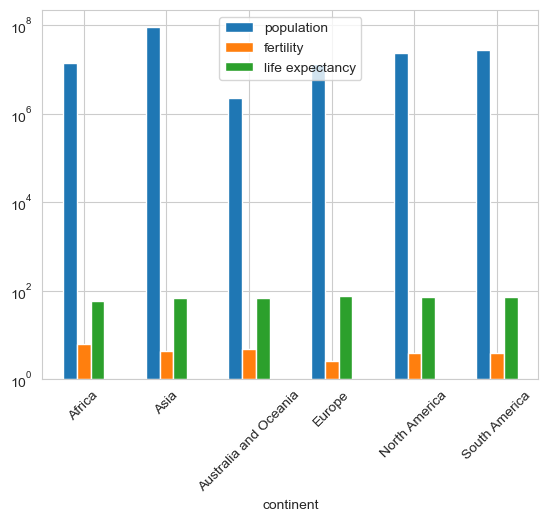

In [182]:
yr_avg(1997).plot(x='continent', y=['population', 'fertility', 'life expectancy'], kind="bar",rot=45, log=True);


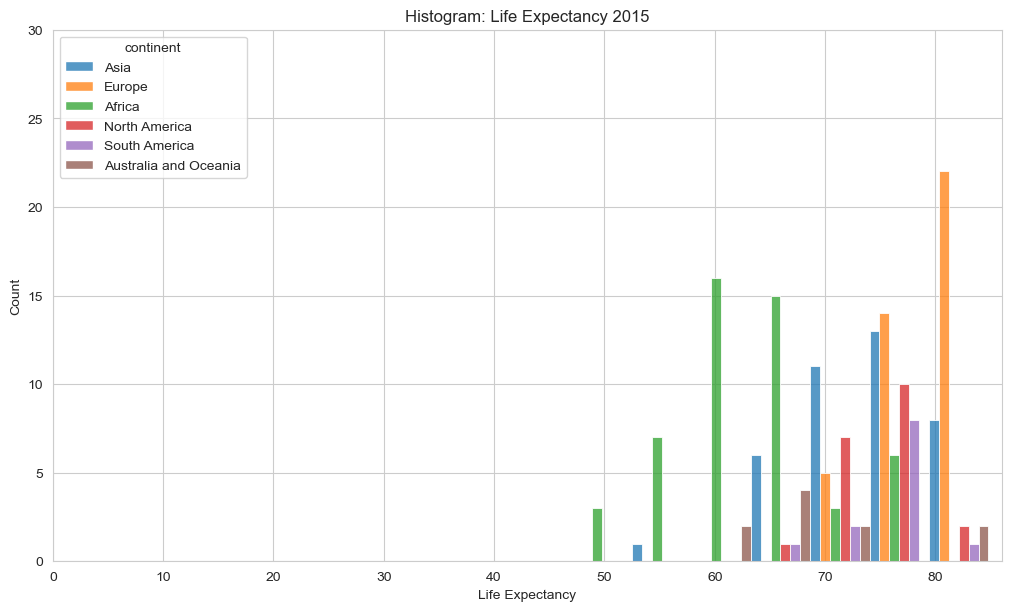

In [291]:
year = 2015

plt.figure(figsize=(10,6),layout='constrained')
sns.set_style('whitegrid')
#plt.ylabel() 
plt.xlabel('Life Expectancy')
plt.axis([0, 86, 0, 30])

sns.histplot(
    data=df_2015,
    x='life expectancy',
    hue='continent', 
    multiple='dodge',
    stat='count',
    bins=7).set(title=f'Histogram: Life Expectancy {year}');

#plt.legend(loc=1, frameon=False, fontsize=10,labelspacing=2.25)

In [243]:
df['life expectancy'].max()

84.8

In [292]:
def life_expec_hist(year):
    yr_df = df[df['year'] == (year)]
    
    plt.figure(figsize=(10,6),layout='constrained')

    sns.set_style('whitegrid')
    plt.xlabel('Life Expectancy')
    plt.axis([0, 86, 0, 42])

    sns.histplot(data=yr_df, x='life expectancy', hue='continent', multiple='dodge', stat='count',bins=7).set(title=f'Histogram: Life Expectancy {year}');
    
    plt.savefig(f'./{year}_life_expec_hist')
    plt.close()


In [295]:
range1=range(1950,1993)
range2=range(1995,2016)

for year in range (1950,2016):
    life_expec_hist(year)

In [296]:
images = []

for year in range(1950,2016):
    filename = f'./fert_count_hist/{year}_fert_count_hist.png'
    images.append(imageio.imread(filename))

imageio.mimsave('./fert_hist.gif', images, duration=100)

/var/folders/zf/w4lxv8m15z9442k97fpp97ch0000gn/T/ipykernel_25884/1992780527.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


In [324]:
df.sample(5)

,year,country,continent,population,fertility,life expectancy
5201,1975,Tanzania,Africa,15980265.0,6.75,52.19
7482,1987,Cyprus,Europe,723380.0,2.45,76.30
8257,1991,Belgium,Europe,10011217.0,1.59,76.20
11820,2008,Slovenia,Europe,2030599.0,1.43,78.70
8220,1990,Tonga,Australia and Oceania,95152.0,4.64,69.10


In [301]:
numerical_variables = ['population', 'fertility', 'life expectancy']
df_num=df[numerical_variables]
df_num.corr()

,population,fertility,life expectancy
population,1.000000,-0.098195,0.027980
fertility,-0.098195,1.000000,-0.805608
life expectancy,0.027980,-0.805608,1.000000


In [427]:
afghanistan = df[df['country']=='Afghanistan']
japan = df[df['country']=='Japan']
vietnam = df[df['country']=='Vietnam']
australia = df[df['country']=='Australia']
chile = df[df['country']=='Chile']
china = df[df['country']=='China']

In [433]:
year = 1960
country = 'China'

numerical_variables = ['population', 'fertility', 'life expectancy']

cntry_df = df[df['country']== (country)]

cntry_yr = cntry_df[cntry_df['year']==(year)]

cntry_yr_num = cntry_yr[numerical_variables]

cntry_yr_num

#cntry_yr_corr=china_yr_num.corr()

#sns.heatmap(cntry_yr_corr,
#            annot=True,
#            cmap='coolwarm',
#            vmin=-1,
#            vmax=+1
#           );

,population,fertility,life expectancy
2046,644450173.0,3.99,30.53


In [313]:
japan_num=japan[numerical_variables]
japan_num.corr()

,population,fertility,life expectancy
population,1.000000,-0.897766,0.988684
fertility,-0.897766,1.000000,-0.934570
life expectancy,0.988684,-0.934570,1.000000


In [314]:
afghanistan_num=afghanistan[numerical_variables]
afghanistan_num.corr()

,population,fertility,life expectancy
population,1.000000,-0.839768,0.838186
fertility,-0.839768,1.000000,-0.528764
life expectancy,0.838186,-0.528764,1.000000


In [425]:
chile_num=chile[numerical_variables]
chile_corr=chile_num.corr()

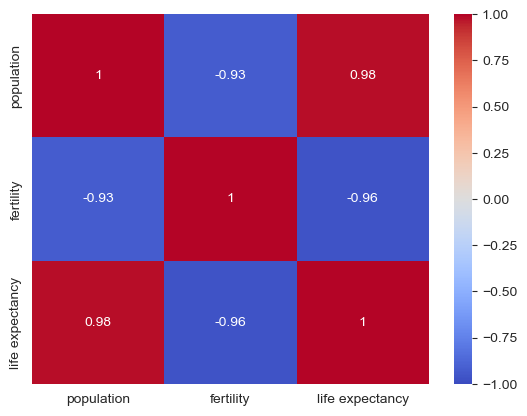

In [426]:
sns.heatmap(chile_corr,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=+1
           );

In [420]:
australia_num=australia[numerical_variables]
aus_corr = australia_num.corr()

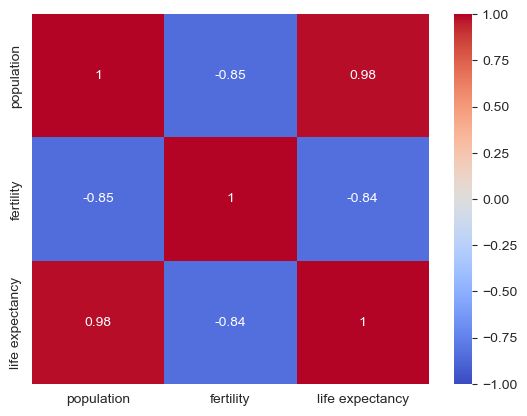

In [421]:
sns.heatmap(aus_corr,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=+1
           );

In [337]:
china = df[df['country']=='China']
china[china['year']==1975]

,year,country,continent,population,fertility,life expectancy
5061,1975,China,Asia,905580445.0,3.58,60.78


In [351]:
df = pd.read_csv('../data/gapminder_total.csv', index_col=0)

In [352]:
def df_(year):
    year_df=df[df['year']==(year)]
    return year_df

In [353]:
df_(1997)

,year,country,continent,population,fertility,life expectancy
9447,1997,Afghanistan,Asia,18034130.0,7.87,49.5
9448,1997,Albania,Europe,3092471.0,2.61,74.1
9449,1997,Algeria,Africa,29887717.0,2.99,72.4
9450,1997,Angola,Africa,13801868.0,6.95,51.7
9451,1997,Antigua and Barbuda,North America,72232.0,2.28,73.9
...,...,...,...,...,...,...
15897,1997,Yugoslavia,NaN,23123738.0,NaN,NaN
15898,1997,Åland,NaN,25419.0,NaN,78.9
15899,1997,South Sudan,Africa,5806951.0,NaN,53.4
15900,1997,Curaçao,NaN,139568.0,NaN,NaN


In [ ]:
sns.boxplot(
    data=df_(1997),
    x='continent',
    y='fertility',
    hue='bill_measurement'
);

In [416]:
def fert_bar(year):
    plt.figure(figsize=(10,10),layout='constrained')
    sns.set_style('whitegrid')
    plt.ylabel('Fertility') 
    plt.xlabel('Continent')
    plt.axis([0, 10.5, 0, 10.5])
    #plt.xticks(rotation=45)
    
    sns.boxplot(
        data=df_(year),
        x='continent',
        y='fertility',
        palette= 'tab10').set(title=f'Box Plot: Fertility by Continent {year}');
    
    plt.savefig(f'./{year}_fert_bar')
    plt.close()


In [409]:
life_expec_bar(1994)

In [417]:
for year in range (1950,2016):
    fert_bar(year)

In [419]:
images = []

for year in range(1950,2016):
    filename = f'./fert_bars/{year}_fert_bar.png'
    images.append(imageio.imread(filename))

imageio.mimsave('./fert_bar.gif', images, duration=100)

/var/folders/zf/w4lxv8m15z9442k97fpp97ch0000gn/T/ipykernel_25884/3534460474.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
